### Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('housing.csv')

### Data Inspecting and Cleaning

The data pertains to the houses found in a given California district and statistics summary based on the 1990 California census.

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Definition:
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

#### Overview of the file

By observing the info section below, we can see that:
- There are 8 numeric features and 1 categorical feature

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Checking for missing values
Utilizing missingno matrix for quick visualization of any patterns of NaN values in the dataset

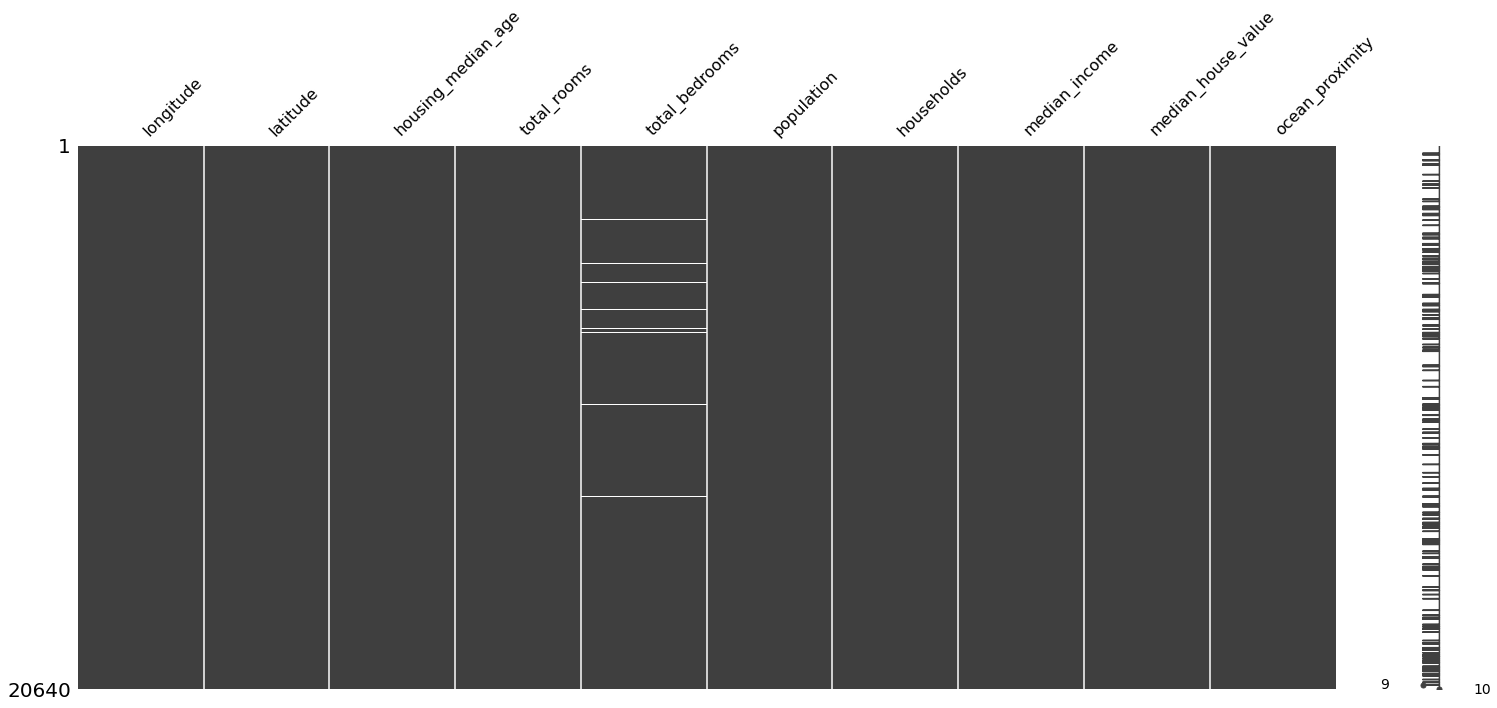

In [29]:
msno.matrix(df)
plt.show()

It can be observed that the feature 'total_bedrooms' is the only column with null values.

In [30]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Due to the fact that it is a small quantity of records that are missing from the dataset, the null values will be dropped. 

In [31]:
df.dropna(axis=0, how='any', subset=['total_bedrooms'], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Observing descriptive statistics of the data.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


### Exploratory Data Analysis

In [34]:
#Extracting numerical columns for analysis
num_col = list(df._get_numeric_data().columns)
print(f'Numeric columns: {num_col}')

Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


### Histogram and Boxplots

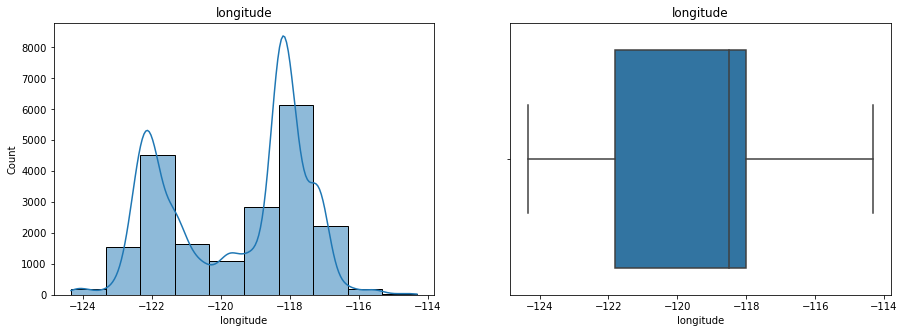

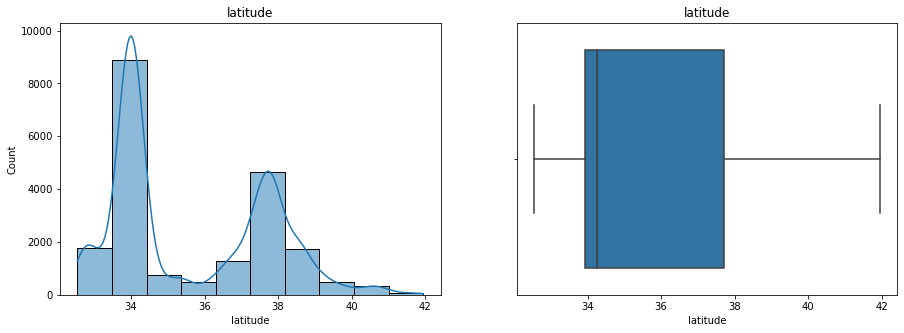

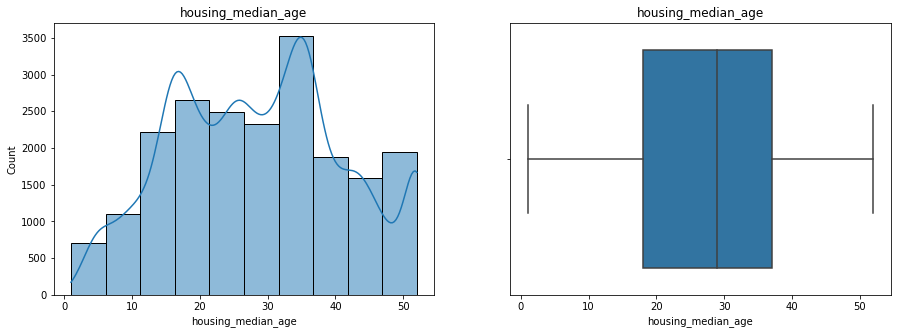

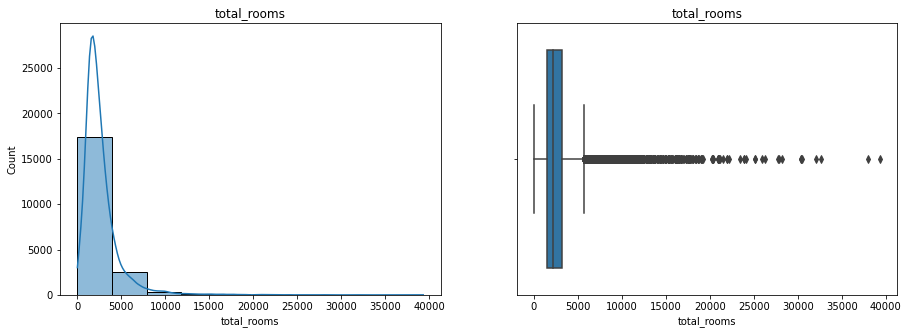

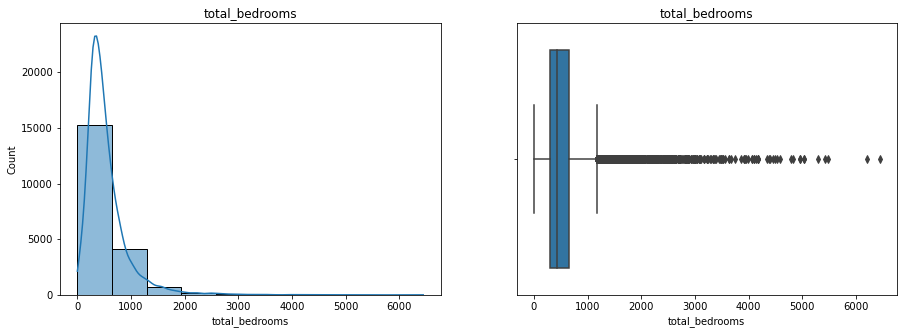

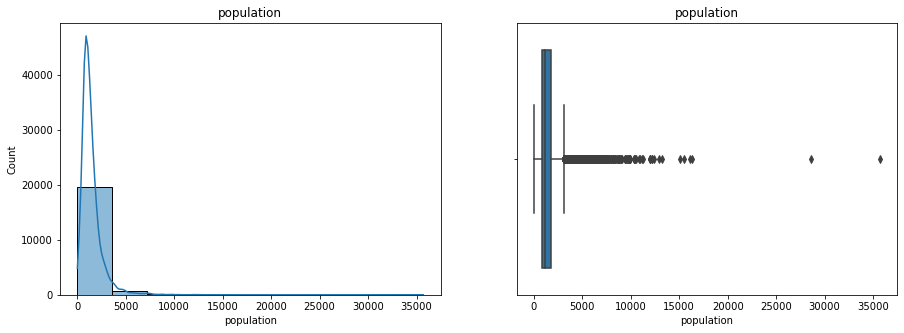

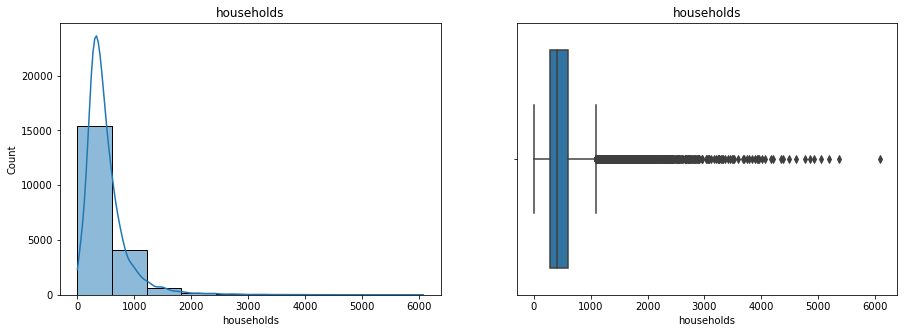

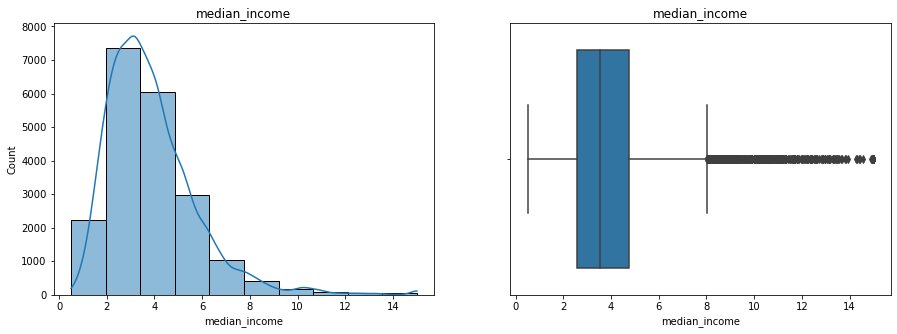

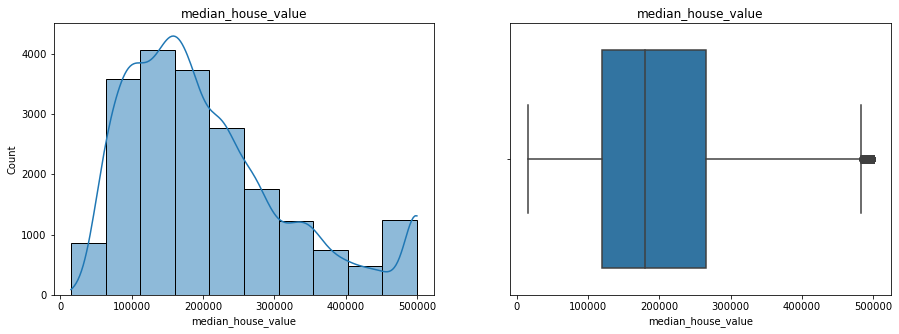

In [35]:
for i in num_col:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.histplot(data=df[i], bins=10, ax=axes[0], kde=True)
    axes[0].set_title(i)
    
    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)

### Pairplot

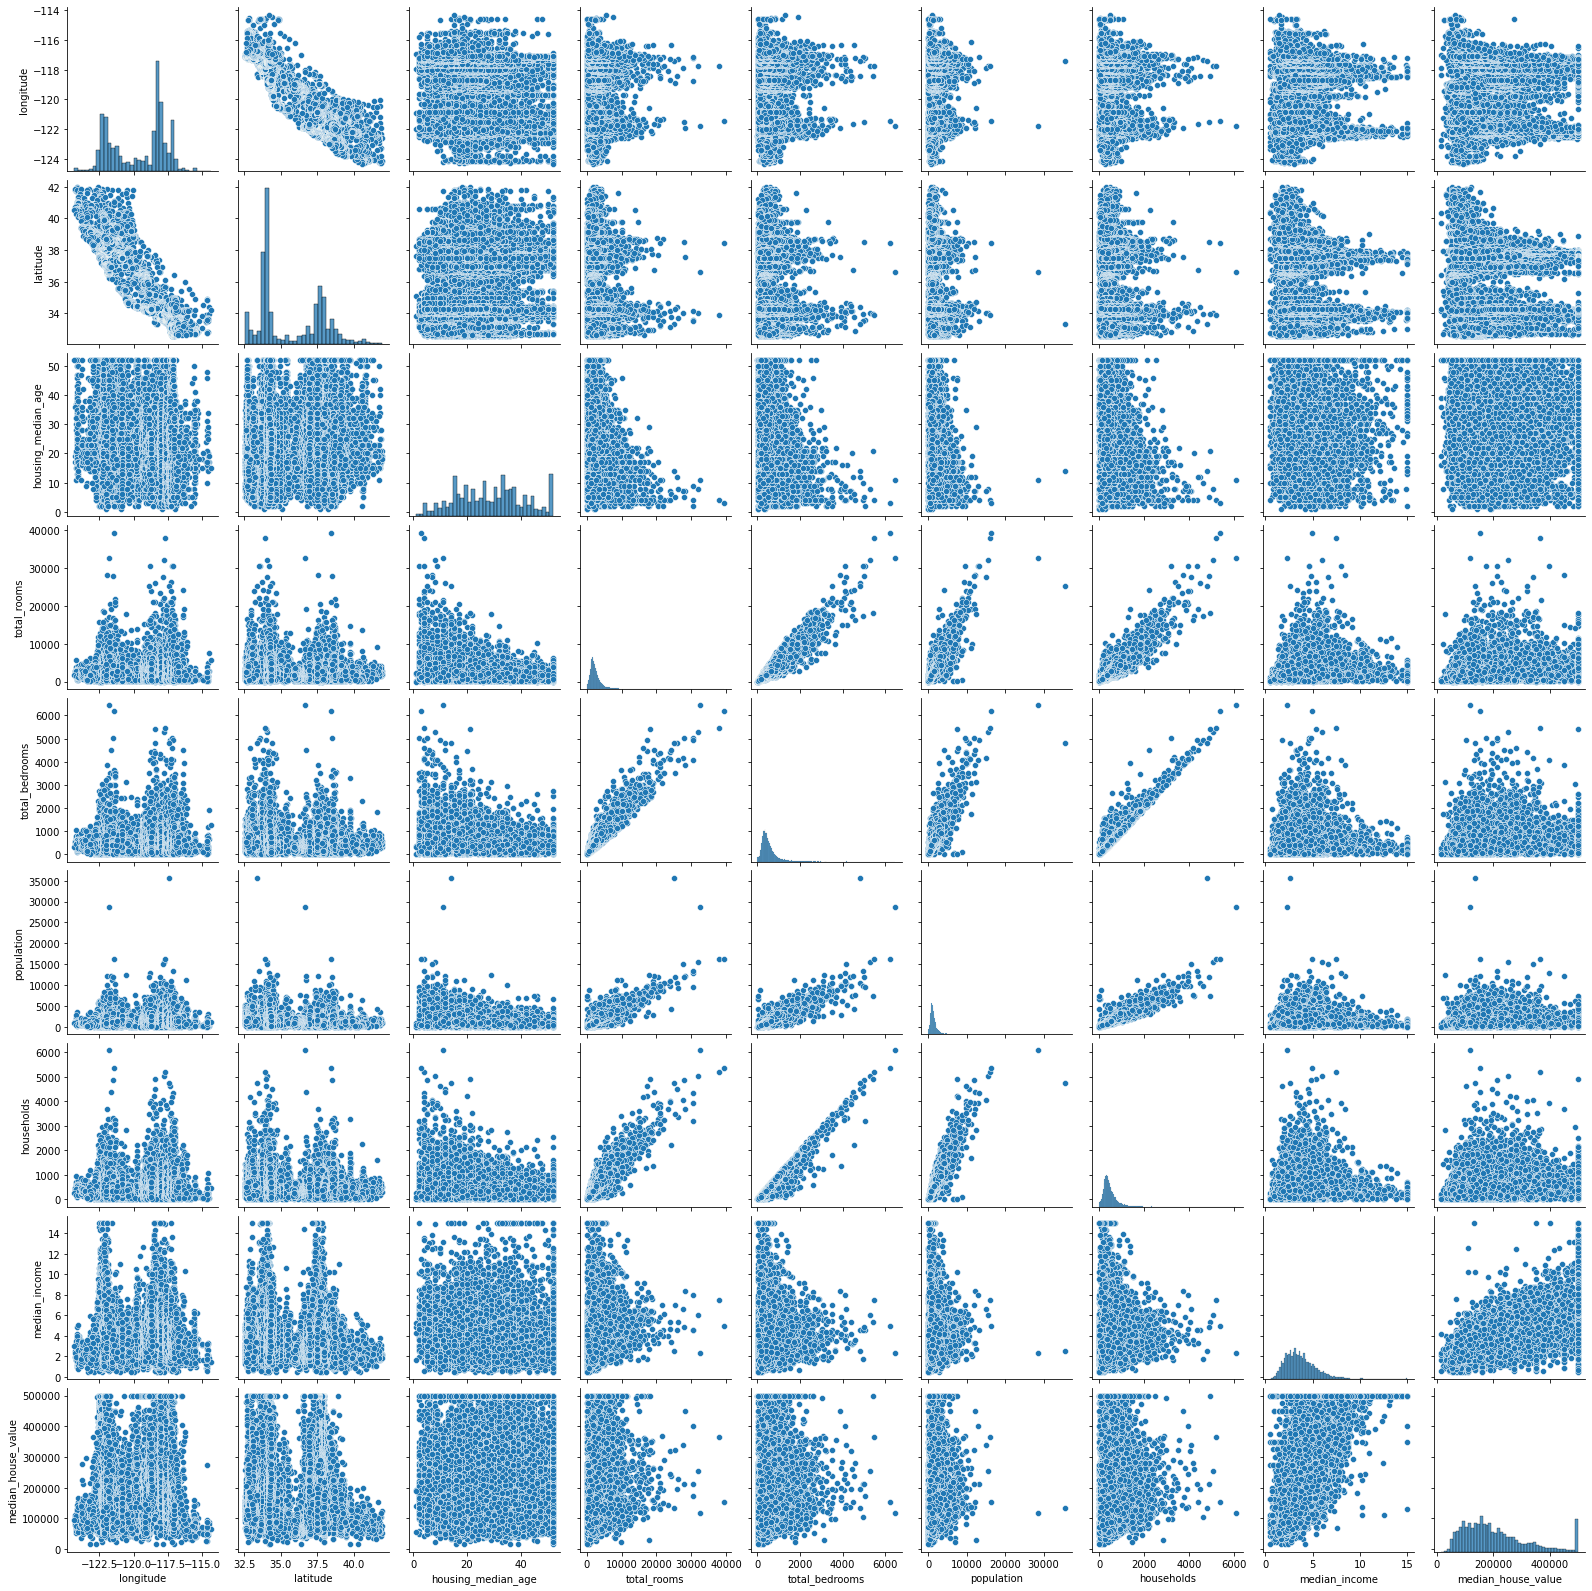

In [36]:
sns.pairplot(df)

From above pairplots few plots can be observed with linear relationship between the variables.

### Scatter plots

From the plots depicted from pairplots, we will observe certain plots in detail mainly to identify the relation between these catergies:
- Relation between median house value vs median income/population/total rooms
- Relation between total rooms vs population/households/total bedrooms
- Relation between housing median age vs population/households/total rooms

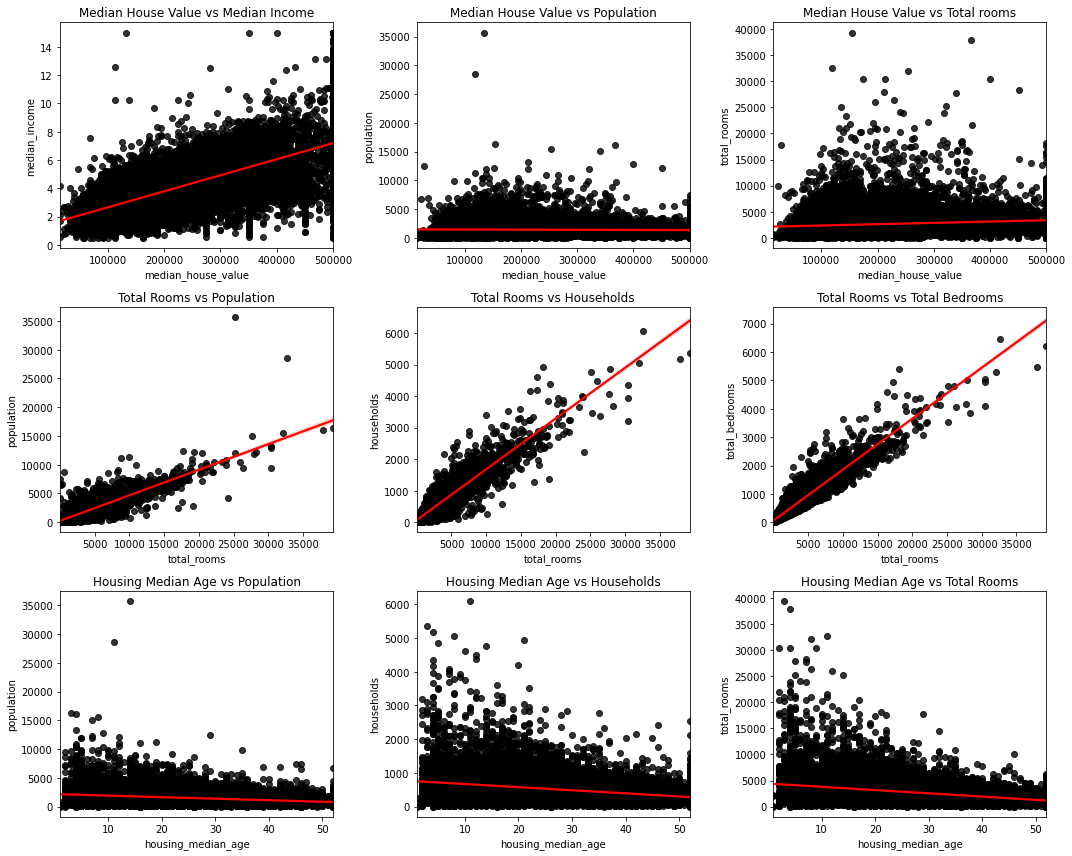

In [93]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
sns.regplot(x='median_house_value', y='median_income', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[0][0])
sns.regplot(x='median_house_value', y='population', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[0][1])
sns.regplot(x='median_house_value', y='total_rooms', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[0][2])

sns.regplot(x='total_rooms', y='population', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[1][0])
sns.regplot(x='total_rooms', y='households', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[1][1])
sns.regplot(x='total_rooms', y='total_bedrooms', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[1][2])

sns.regplot(x='housing_median_age', y='population', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[2][0])
sns.regplot(x='housing_median_age', y='households', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[2][1])
sns.regplot(x='housing_median_age', y='total_rooms', data=df,scatter_kws={'color':'black'}, line_kws={'color':'red'}, ax=axs[2][2])

axs[0][0].set_title('Median House Value vs Median Income');
axs[0][1].set_title('Median House Value vs Population');
axs[0][2].set_title('Median House Value vs Total rooms');
axs[1][0].set_title('Total Rooms vs Population');
axs[1][1].set_title('Total Rooms vs Households');
axs[1][2].set_title('Total Rooms vs Total Bedrooms');
axs[2][0].set_title('Housing Median Age vs Population');
axs[2][1].set_title('Housing Median Age vs Households');
axs[2][2].set_title('Housing Median Age vs Total Rooms');

plt.tight_layout()

The trend line on the scatter plots reveals few major points:
- Median house value increases the median income is higher.
- Median house value does not seem to be affected by the population as the change in trend-line is negligeable however, it shows that number of total rooms are higher as the population increases.
- The housing median age has negative relationship with the population and age increases as the population decreases. This depicts that the house/building are much newer in the areas where population is higher.
- Total rooms and bedrooms and Households reveals almost perfect linear relationship. 

### Distribution of Ocean Proximity

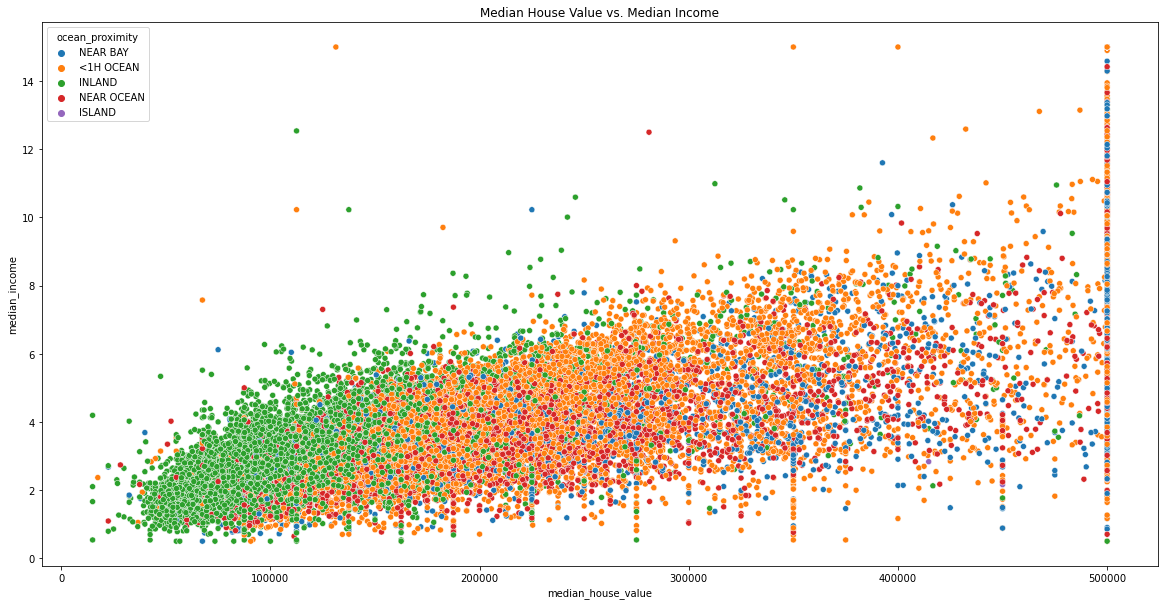

In [95]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='median_house_value', y='median_income', data=df, hue='ocean_proximity')
plt.title('Median House Value vs. Median Income')
plt.show()

From the above scatterplot, it can be observed that the majority of the median house values are slightly higher as it is closer to the Ocean. The houses located near the bay has the highest values.

### Housing distribution based on Latitude/Longitude

Below plot represents the map of the hosing distribution plotted based on the Latitude and Longitude data.
As it was observed in the above scatter plot, it is evident that the housing values increases as is located closer to the ocean.
Another observation that can be made from the chart is that the majority of the houses valued in between 400000 - 500000 are concentrated in two major areas near where the largest cities (San Francisco and Los Angeles) of the California state is located.

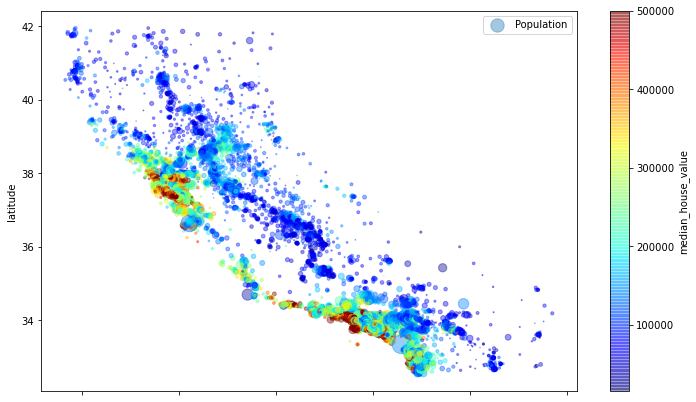

In [37]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df['population']/100, label='Population', figsize=(12, 7),
       c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

### Heatmap

In [38]:
corr_df = df.corr()

<AxesSubplot:>

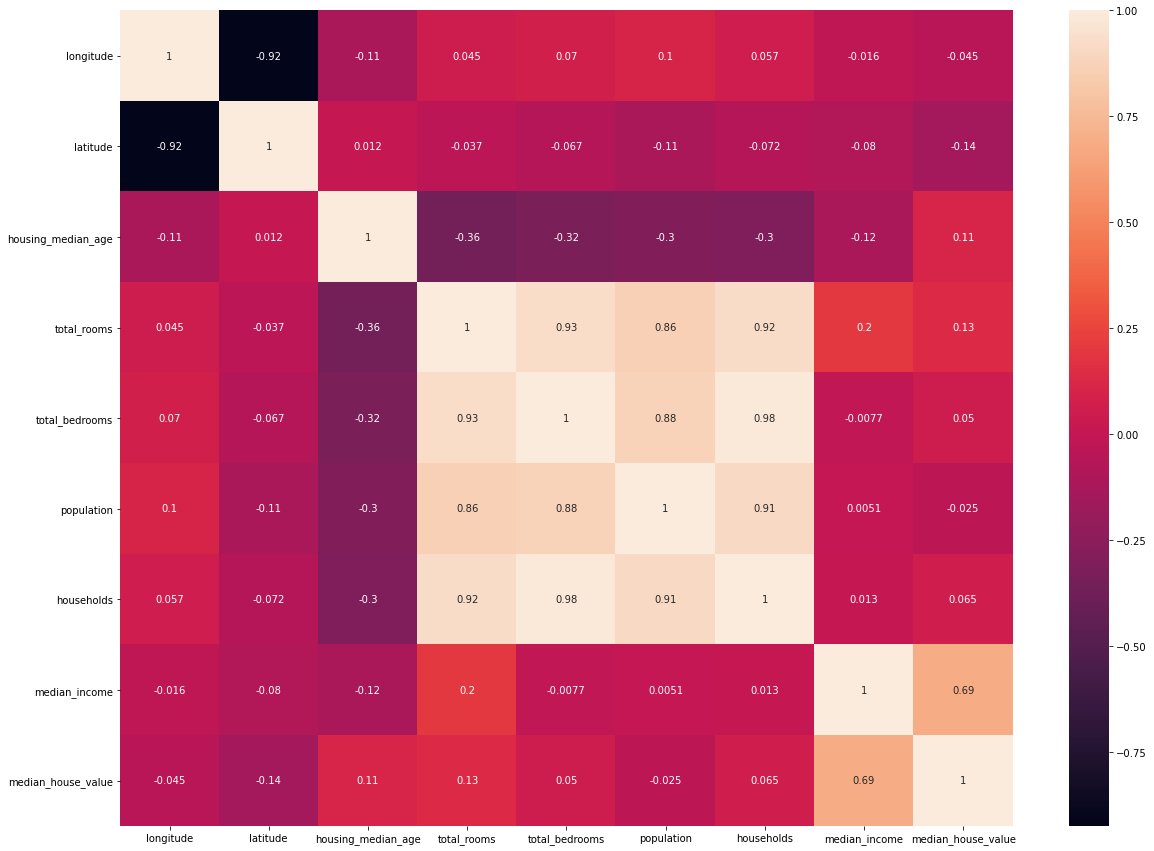

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True)

In above Heatmap, we can observe that there are strong correlation between total_rooms and total_bedrooms, population and households.

### Preprocessing data
There is 1 Categorical feature ('ocean_proximity') in the dataset. Since there are 2 types of data (Continuous and Categorical), it requires different preprocessing steps. The categorical feature requires one-encoding while continuous features require standard scaling. The Column Transformer is a module which allows to perform different preprocessing and feature extraction steps on different data types. The continuous feature and categorical feature will be combined and applied through Column Trnasformer module and is used in integrating the preprocessed features.

In [40]:
#applying PolynomialFeatures and StandardScaler prepocessing steps to the numeric columns
num_feature= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
num_transformer = Pipeline(steps=[('poly', PolynomialFeatures(degree=2)),
                                 ('scaler', StandardScaler())])
#Preprocessing the Categorical Column and one-hot encoding the categorical data
cat_feature = ['ocean_proximity']
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [41]:
#Combine two preprocessed steps together using Column Transformer module
full_transformer = ColumnTransformer([("num", num_transformer, num_feature),
                                     ('cat', cat_transformer, cat_feature)])

### Training the Data-set

In [42]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_final = full_transformer.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=30, random_state=42)

### Linear Regression

In [44]:
#Fitting the training data set in linear regression model
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Evaluing the model
The metric I have utilized for the performance of the model is as follows:
- the mean of the Acutal/Predicted values. 
- Mean Absolute Error & Mean Squared Error : Common error measurements for regression models,
- R2 score : Coefficient of determination which is used to evaluate the performance of regression models.

In [45]:
#Evaluation on training set
lin_reg.score(X_train, y_train)

0.7025180965706229

The Training score for the linear regression gives 70.25% accuracy

In [46]:
#Evaluation on Test set
actual = y_test
prediction = lin_reg.predict(X_test)

In [47]:
print(f'Actual: {np.mean(actual)}')
print(f'Prediction: {np.mean(prediction)}')
print('MAE: ' + str(mean_absolute_error(actual, prediction)))
print('MSE: ' + str(mean_squared_error(actual, prediction)))
print('Score: ' + str(r2_score(actual, prediction)))

Actual: 201560.03333333333
Prediction: 200308.38814980985
MAE: 39981.67721326389
MSE: 2301822803.6630006
Score: 0.6892199470190238


In the above evaluation, the linear regression model provides R2 score of 68.92% on the Test-set and 70.25% on the Training-set. It can be observed that the base Linear Regression model provides fair performance for the prediction without any overfitting.

### Evaluation on multiple Predictive models
For further evaluation of the dataset, I have utilized various regression models to compare the performance:
- SGD Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Machine
- K-Neighbors Regressor
- XGB Regressor

In [76]:
#Creating list of regression modules
models =[
    LinearRegression(),
    SGDRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor()
]
#Creating empty list of results
results={'Model':[],'Actual':[], 'Prediction':[], 'MAE':[], 'MSE':[],'R2 Score':[]}

In [77]:
#defining function for training and fitting the regression models 
def calculation_results(regressor, X_train, y_train, X_test, y_test):
    
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    actual = np.mean(y_test)
    prediction = np.mean(y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)*100
    
    return type(regressor).__name__ , actual, prediction, MAE, MSE, r2

In [78]:
#creating loop for appending on the created list of the results
for regressor in models: 
    final = calculation_results(regressor, X_train, y_train, X_test, y_test)
    results['Model'].append(final[0])
    results['Actual'].append(final[1])
    results['Prediction'].append(final[2])
    results['MAE'].append(final[3])
    results['MSE'].append(final[4])
    results['R2 Score'].append(final[5])  

### Machine Learning models comparison

Below table presents the value comparison between different models. It can be observed that the Linear Regression predicted value closest to the Actual, however, Random Forest Regressor have the highest R2 score. Since the R2 score is used to evalute the performance of the model, Random forest regressor would be the top performing model for the project. 

In [79]:
results=pd.DataFrame(results)
results

,Model,Actual,Prediction,MAE,MSE,R2 Score
0,LinearRegression,201560.033333,200308.388150,39981.677213,2.301823e+09,68.921995
1,SGDRegressor,201560.033333,147472.858436,749684.830827,8.464271e+11,-11328.015151
2,RandomForestRegressor,201560.033333,193500.989000,22289.514333,8.182450e+08,88.952485
3,GradientBoostingRegressor,201560.033333,190619.026168,28421.437036,1.400896e+09,81.085839
4,SVR,201560.033333,179785.170562,64794.844309,7.791677e+09,-5.199133
5,KNeighborsRegressor,201560.033333,191853.340000,32257.360000,1.769304e+09,76.111781
6,XGBRegressor,201560.033333,193028.015625,25829.178255,1.142237e+09,84.578118


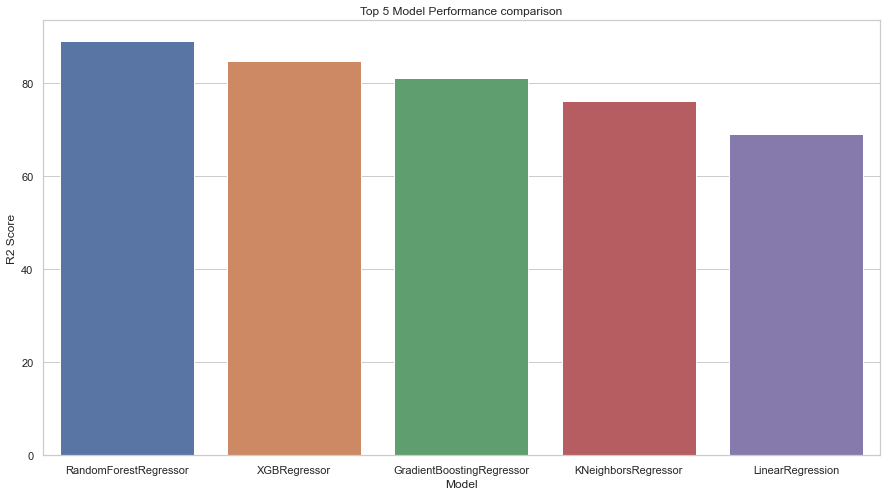

In [112]:
#Extracting top 5 performance and creating bar graph for comparison
Top5 = results.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)[:5]

plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
sns.barplot(x='Model', y='R2 Score', data=Top5)

plt.title('Top 5 Model Performance comparison')
plt.show()
